In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


# Findouts

1. Importing important libraries
2. Reading dataset
3. Data visualization
4. Feature Engineering
5. Data pre-processing
6. Building models
7. Base models
8. Stacking models
9. Submission
10. Conclusion

# Importing important libraries...

In [2]:
# here we are importing libraries for doing further analysis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from scipy.stats import norm, skew

# Reading dataset...

In [3]:
Train = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
Test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

In [4]:
# here we are printing first 5 lines of our train dataset
Train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Here we are printing first 5 line of our test dataset
Test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Data visualization

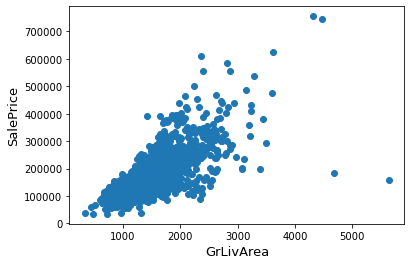

In [6]:
# here we are exploring outliers
fig, ax = plt.subplots()
ax.scatter(x = Train['GrLivArea'], y = Train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

here we can see that at the bottom right two with extremely otliers

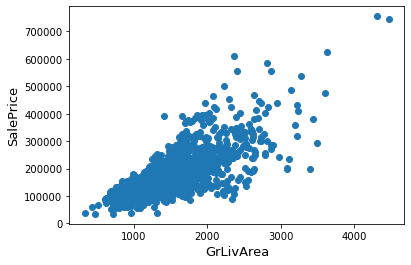

In [7]:
# here we are deleting outliers
Train = Train.drop(Train[(Train['GrLivArea']>4000) & (Train['SalePrice']<300000)].index)

#Checking graphic again
fig, ax = plt.subplots()
ax.scatter(Train['GrLivArea'], Train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

Traget Variable.
SalePrice is the variable we need to predict, So let's do some analysis on this variable first.


 mu = 180932.92 and sigma = 79467.79



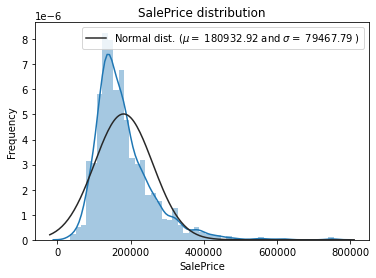

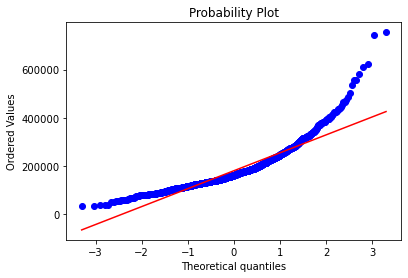

In [8]:
sns.distplot(Train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(Train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Plot the QQ-plot
fig = plt.figure()
res = stats.probplot(Train['SalePrice'], plot=plt)
plt.show()

here we are doing Log-transformation of the target variable.


 mu = 12.02 and sigma = 0.40



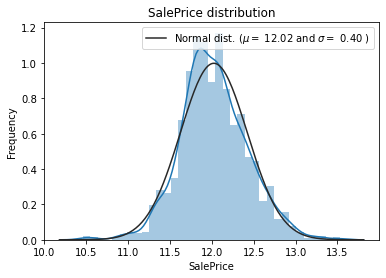

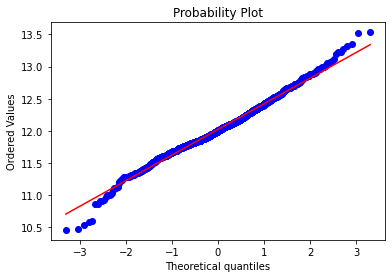

In [9]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
Train["SalePrice"] = np.log1p(Train["SalePrice"])

#Checking the new distribution 
sns.distplot(Train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(Train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Plot the QQ-plot
fig = plt.figure()
res = stats.probplot(Train['SalePrice'], plot=plt)
plt.show()

# Feature Engineering...

In [10]:
# here we are printing sum of all null values in train dataset
print(Train.isnull().sum())
print(sum(Train.isnull().sum()))

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
6958


In [11]:
# here we are printing sum of all null values in test dataset
print(Test.isnull().sum())
print(sum(Test.isnull().sum()))

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64
7000


In [12]:
# here we are printing shape of our train and test dataset
print("Train shape:", Train.shape)
print("Test shape:", Test.shape)

Train shape: (1458, 81)
Test shape: (1459, 80)


In [13]:
Train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1458 non-null   int64  
 1   MSSubClass     1458 non-null   int64  
 2   MSZoning       1458 non-null   object 
 3   LotFrontage    1199 non-null   float64
 4   LotArea        1458 non-null   int64  
 5   Street         1458 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1458 non-null   object 
 8   LandContour    1458 non-null   object 
 9   Utilities      1458 non-null   object 
 10  LotConfig      1458 non-null   object 
 11  LandSlope      1458 non-null   object 
 12  Neighborhood   1458 non-null   object 
 13  Condition1     1458 non-null   object 
 14  Condition2     1458 non-null   object 
 15  BldgType       1458 non-null   object 
 16  HouseStyle     1458 non-null   object 
 17  OverallQual    1458 non-null   int64  
 18  OverallC

In [14]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [15]:
# Saving the 'Id' column
train_ID = Train['Id']
test_ID = Test['Id']
# now we are droping id column because this feature is not neccesary for prediction process
Train = Train.drop("Id",axis=1)
Test = Test.drop("Id",axis=1)

In [16]:
# here we are again printing shape of our dataset to see that id column is replace or not
print("Train shape:", Train.shape)
print("Test shape:", Test.shape)

Train shape: (1458, 80)
Test shape: (1459, 79)


In [17]:
# here we are printing all the name of columns that are present in our dataset
for col in Train.columns: 
    print(col) 

MSSubClass
MSZoning
LotFrontage
LotArea
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
PoolQC
Fence
MiscFeature
MiscVal
MoSold
YrSold
SaleType
SaleCondition
SalePrice


In [18]:
# here we are printing summary of train dataset
Train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1458.000000,1199.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1450.000000,1458.000000,1458.000000,...,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,56.893004,69.797331,10459.936900,6.093964,5.576132,1971.218107,1984.834019,102.753793,438.827160,46.613169,...,94.084362,46.245542,21.984225,3.414266,15.081619,2.433471,43.548697,6.323045,2007.816187,12.024015
std,42.329437,23.203458,9859.198156,1.376369,1.113359,30.193754,20.641760,179.442156,432.969094,161.420729,...,125.350021,65.312932,61.155666,29.337173,55.792877,38.209947,496.460799,2.700167,1.328826,0.399713
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,10.460271
25%,20.000000,59.000000,7544.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,11.774720
50%,50.000000,69.000000,9475.000000,6.000000,5.000000,1972.500000,1994.000000,0.000000,382.000000,0.000000,...,0.000000,24.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,12.001512
75%,70.000000,80.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,164.750000,711.000000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,12.273736
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2188.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,13.534474


In [19]:
# here we are printing summary of test dataset
Test.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


# Data pre-processing

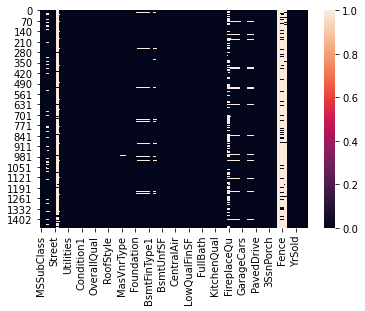

In [20]:
# here we are visualising null value in our train dataset
sns.heatmap(Train.isnull())

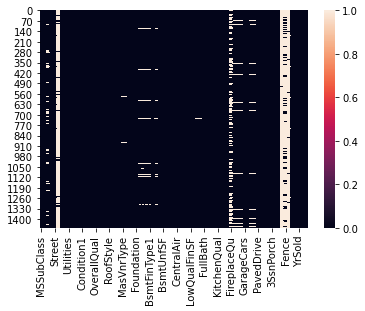

In [21]:
# here we are visualising null value in our test dataset
sns.heatmap(Test.isnull())

In [22]:
# here we are concating our train and test dataset
ntrain = Train.shape[0]
ntest = Test.shape[0]
y_train = Train.SalePrice.values
train_test_data = pd.concat((Train, Test)).reset_index(drop=True)


In [23]:
# here we are droping salesprices columns from our concat dataset
train_test_data.drop(["SalePrice"],axis=1,inplace=True)


In [24]:
# now we are printing shape of our concat dataset
print("train_test_data size is: {}".format(train_test_data.shape))

train_test_data size is: (2917, 79)


In [25]:
# here we are counting the null value of each column
null = pd.DataFrame(train_test_data.isnull().sum().sort_values(ascending=False)[:25])
null.columns = ["Null counts"]
null.index.name = "Feature"
null

,Null counts
Feature,
PoolQC,2908
MiscFeature,2812
Alley,2719
Fence,2346
FireplaceQu,1420
LotFrontage,486
GarageCond,159
GarageQual,159
GarageYrBlt,159


In [26]:
# here we are counting null value in percent
all_data_na = (train_test_data.isnull().sum() / len(train_test_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageFinish,5.450806
GarageYrBlt,5.450806
GarageQual,5.450806
GarageCond,5.450806


Text(0.5, 1.0, 'Percent missing data by feature')

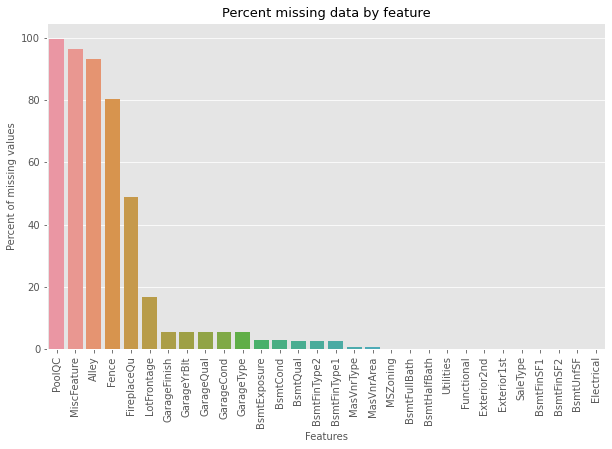

In [27]:
# here we are plotting the upper tabular form into graph
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=10)
plt.ylabel('Percent of missing values', fontsize=10)
plt.title('Percent missing data by feature', fontsize=13)

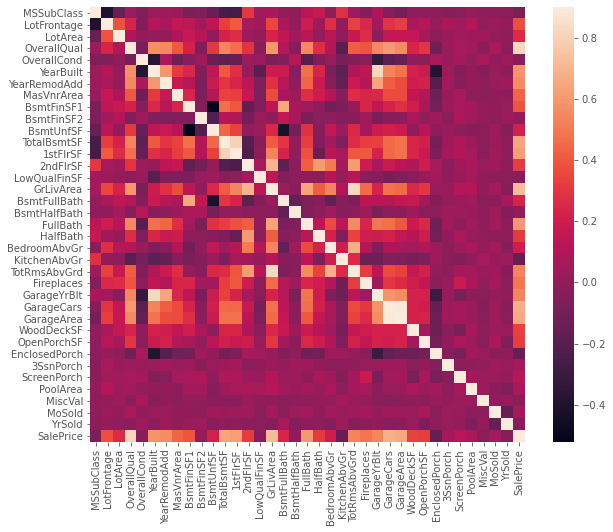

In [28]:
# here we are making correlation graph to see how features are correlated with saleprice
plt.figure(figsize=(10,8))
corrMatrix=Train.corr()
sns.heatmap(corrMatrix,vmax=0.9,square =True)
plt.show()

**Imputing missing value**

In [29]:
# firstly we are filling null value of column PoolQC
# data description says null means "No Pool". That make sense,
# given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general,
# so we are going to fill null values with none
train_test_data["PoolQC"] = train_test_data["PoolQC"].fillna("None")

In [30]:
# secondly we are filling null values of column MiscFeature
# data description says null means "no misc feature",as given that the huge ratio of missing value,
# so we are going to fill null values with none
train_test_data["MiscFeature"] = train_test_data["MiscFeature"].fillna("None")

In [31]:
# now we are filling null values of column Alley 
# data description says NA means "no alley access", as given that the huge ratio of missing value,
# so we are going to fill null values with none
train_test_data["Alley"] = train_test_data["Alley"].fillna("None")

In [32]:
# now we are filling null values of column Fence 
# data description says NA means "no fence", as given that the huge ratio of missing value,
# so we are going to fill null values with none
train_test_data["Fence"] = train_test_data["Fence"].fillna("None")

In [33]:
# now we are filling null values of column FireplaceQu
# data description says NA means "no fireplace",as given that the huge ratio of missing value,
# so we are going to fill null values with none
train_test_data["FireplaceQu"] = train_test_data["FireplaceQu"].fillna("None")

In [34]:
# now we are filling null values of column LotFrontage
# we are going to Group by neighborhood and fill in missing value 
# by the median LotFrontage of all the neighborhood
train_test_data["LotFrontage"] = train_test_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [35]:
# now we are filling null values of columns GarageYrBlt, GarageArea and GarageCars  
# Replacing missing data with 0 Since No garage = no cars in such garage.
train_test_data["GarageYrBlt"] = train_test_data["GarageYrBlt"].fillna(0)
train_test_data["GarageArea"] = train_test_data["GarageArea"].fillna(0)
train_test_data["GarageCars"] = train_test_data["GarageCars"].fillna(0)



In [36]:
# now we are filling null values of columns GarageType, GarageFinish, GarageQual and GarageCond 
# replacing missing data with none 
train_test_data["GarageType"] = train_test_data["GarageType"].fillna("None")
train_test_data["GarageFinish"] = train_test_data["GarageFinish"].fillna("None")
train_test_data["GarageQual"] = train_test_data["GarageQual"].fillna("None")
train_test_data["GarageCond"] = train_test_data["GarageCond"].fillna("None")

In [37]:
# now we are filling null values of columns BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath 
# and BsmtHalfBath
# Replacing missing values with 0 for having no basement
train_test_data["BsmtFinSF1"] = train_test_data["BsmtFinSF1"].fillna(0)
train_test_data["BsmtFinSF2"] = train_test_data["BsmtFinSF2"].fillna(0)
train_test_data["BsmtUnfSF"] = train_test_data["BsmtUnfSF"].fillna(0)
train_test_data["TotalBsmtSF"] = train_test_data["TotalBsmtSF"].fillna(0)
train_test_data["BsmtFullBath"] = train_test_data["BsmtFullBath"].fillna(0)
train_test_data["BsmtHalfBath"] = train_test_data["BsmtHalfBath"].fillna(0)


In [38]:
# now we are filling null values in these categorical columns
# BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2
# replacing missing values with none for having on basement
train_test_data["BsmtQual"] = train_test_data["BsmtQual"].fillna("none")
train_test_data["BsmtCond"] = train_test_data["BsmtCond"].fillna("none")
train_test_data["BsmtExposure"] = train_test_data["BsmtExposure"].fillna("none")
train_test_data["BsmtFinType1"] = train_test_data["BsmtFinType1"].fillna("none")
train_test_data["BsmtFinType2"] = train_test_data["BsmtFinType2"].fillna("none")

In [39]:
# now we are filling null values of columns MasVnrArea and MasVnrType
# replacing missing value with none in column MasVnrType and 0 in column MasVnrArea 
# for having no masonry veneer for these houses
train_test_data["MasVnrArea"] = train_test_data["MasVnrArea"].fillna(0)
train_test_data["MasVnrType"] = train_test_data["MasVnrType"].fillna("None")

In [40]:
# now we are filling null values of column MSZoning
# as 'RL' is by far the most common value.
# so we are replacing missing values with RL using mode
train_test_data["MSZoning"] = train_test_data["MSZoning"].fillna(train_test_data['MSZoning'].mode()[0])

In [41]:
# here we are removing Utilities column because it will not play important role in doing prediction
train_test_data = train_test_data.drop(['Utilities'], axis=1)

In [42]:
# here we are filling null values of column Functional
# data description says NA means typical so we are filling missing values with TYP
train_test_data["Functional"] = train_test_data["Functional"].fillna("Typ")

In [43]:
# here we are filling null values of column Electrical
# It has one NA value. Since this feature has mostly 'SBrkr', 
# so we are filling missing values with "SBrkr" using mode
train_test_data["Electrical"] = train_test_data["Electrical"].fillna(train_test_data["Electrical"].mode()[0])

In [44]:
# here we are filling null values of column KitchenQual  
# Only one NA value, and same as Electrical,since this feature has mostly "TA",
# so we are filling missing values with "TA" using mode
train_test_data["KitchenQual"] = train_test_data["KitchenQual"].fillna(train_test_data["KitchenQual"].mode()[0])

In [45]:
# here we are filling null values of columns Exterior1st and Exterior2nd
# Again Both Exterior 1 & 2 have only one missing value,
# so we are filling missing values using mode
train_test_data["Exterior1st"] = train_test_data["Exterior1st"].fillna(train_test_data["Exterior1st"].mode()[0])
train_test_data["Exterior2nd"] = train_test_data["Exterior2nd"].fillna(train_test_data["Exterior2nd"].mode()[0])

In [46]:
# here we are filling null values of columns SaleType
# Since this feature has mostly 'WD'
# so we are filling missing values with "WD" using mode
train_test_data["SaleType"] = train_test_data["SaleType"].fillna(train_test_data["SaleType"].mode()[0])

In [47]:
# here we are filling null values of columns MSSubClass
# data discription Na most likely means No building class
# so we are going to replace missing values with none
train_test_data["MSSubClass"] = train_test_data["MSSubClass"].fillna("none")

In [48]:
# now checking ones again if there is any missing value or not
all_data_na = (train_test_data.isnull().sum() / len(train_test_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


**Transforming some numerical variables that are really categorical**

In [49]:
#MSSubClass The building class
train_test_data['MSSubClass'] = train_test_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
train_test_data['OverallCond'] = train_test_data['OverallCond'].astype(str)


#Changing Year and month sold are into categorical features.
train_test_data['YrSold'] = train_test_data['YrSold'].astype(str)
train_test_data['MoSold'] = train_test_data['MoSold'].astype(str)

**Performing Label Encoding**

In [50]:
# here we are imporitng libraries for performing label encoder
from sklearn.preprocessing import LabelEncoder
columns = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
for c in columns:
    lb = LabelEncoder()
    lb.fit(list(train_test_data[c].values))
    train_test_data[c] = lb.transform(list(train_test_data[c].values))
# here we are printing shape of our dataset
train_test_data.shape

(2917, 78)

In [51]:
# here we are adding one more feature
# adding total sqfootage feature this feature is combination of total area of basement,first
# and second floor area of each house
train_test_data["TotalSF"] = train_test_data["TotalBsmtSF"]+train_test_data["1stFlrSF"]+train_test_data["2ndFlrSF"]

**Skewed features**

In [52]:
from scipy import stats
from scipy.stats import norm, skew
numeric_feats = train_test_data.dtypes[train_test_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = train_test_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


**Box Cox Transformation of (highly) skewed features**

In [53]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    train_test_data[feat] = boxcox1p(train_test_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 59 skewed numerical features to Box Cox transform


In [54]:
# creating dummy variable of categorical features
train_test_data = pd.get_dummies(train_test_data)
print(train_test_data.shape)

(2917, 220)


# Building Model

In [55]:
# here we are getting new set of train and test
x = train_test_data[:ntrain]
y = train_test_data[ntrain:]

In [56]:
# here we are imporitng important libraries which we are needed in doing prediction
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge,LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [57]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(x.values)
    rmse= np.sqrt(-cross_val_score(model, x.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

#  Base Models

**Lasso regrssion**

This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's Robustscaler() method on pipeline.

In [58]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [59]:
# here we are calculating base model score
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))



Lasso score: 0.1114 (0.0075)



**Elastic Net Regression**

again for outliers

In [60]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [61]:
# calculating Base model score
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1114 (0.0075)



**Kernel Ridge Regression**

In [62]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [63]:
# calculating base model score
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1152 (0.0077)



**LightGBM**

In [64]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)


In [65]:
# calculating base model score
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1157 (0.0062)



# Stacking models

**Averaged base models class**

In [66]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

**Averaged base models score**

In [67]:
averaged_models = AveragingModels(models = (ENet, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1107 (0.0077)



**Stacking averaged Models Class**

In [68]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)


**Stacking Averaged models Score**

In [69]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet,KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1109 (0.0076)


In [70]:
def rmsle(Y, y_pred):
    return np.sqrt(mean_squared_error(Y, y_pred))

**Final Training and Prediction**

In [71]:
stacked_averaged_models.fit(x.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(x.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(y.values))
print(rmsle(y_train, stacked_train_pred))

0.09483367340544521


In [72]:
model_lgb.fit(x, y_train)
lgb_train_pred = model_lgb.predict(x)
lgb_pred = np.expm1(model_lgb.predict(y.values))
print(rmsle(y_train, lgb_train_pred))

0.07261907708573882


In [73]:
# RMSE on the entire Train data when averaging

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               + lgb_train_pred*0.15 ))

RMSLE score on train data:
1.8069622854033116


In [74]:
ensemble = stacked_pred*0.70+ lgb_pred*0.15
ensemble

array([101889.65128723, 137265.52181177, 156431.07213992, ...,
       146665.85070046,  97573.0754317 , 190839.76602551])

**Submission**

In [75]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)
print(sub)

        Id      SalePrice
0     1461  101889.651287
1     1462  137265.521812
2     1463  156431.072140
3     1464  167369.888062
4     1465  166003.483584
...    ...            ...
1454  2915   74386.173564
1455  2916   70432.920775
1456  2917  146665.850700
1457  2918   97573.075432
1458  2919  190839.766026

[1459 rows x 2 columns]
